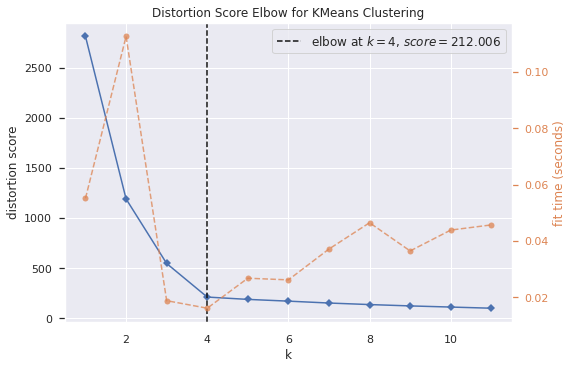

4


In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer

import seaborn as sns; sns.set()  # for plot styling

import numpy as np

from scipy.stats import mode

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)


# determine the best k for k-means

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        
visualizer.show()

#show the elbow plot
bestK = visualizer.elbow_value_


score = 1.0


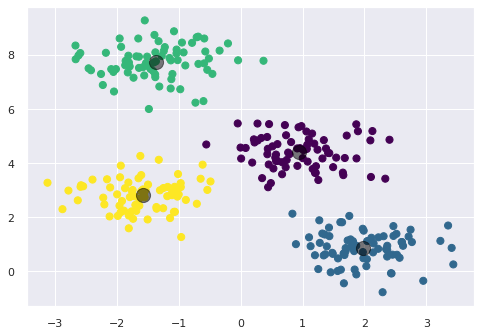

In [3]:
# Fit model with bestK and predict y values

model = KMeans(n_clusters=bestK)
model.fit(X)
y = model.predict(X)

# Map predictions to org labels and calc accuracy score

labels = np.zeros_like(y)

for i in range(bestK):
    mask = (y == i)
    labels[mask] = mode(y_true[mask])[0]

score = accuracy_score(y_true, labels)

print('score = ' + repr(score))
# more plots for visuals
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

# predicted centroids
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

[[75  0  0  0]
 [ 0 75  0  0]
 [ 0  0 75  0]
 [ 0  0  0 75]]


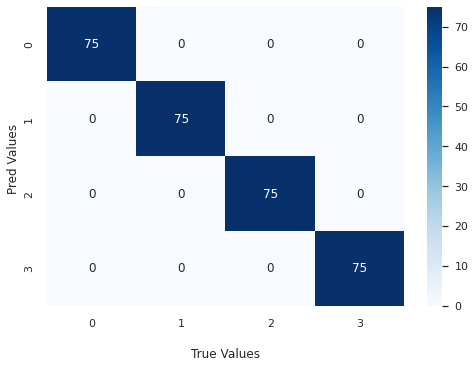

In [11]:
#  draw a confusion matrix
mat = confusion_matrix(y_true, labels)


print(mat)

CM =  sns.heatmap(mat, annot=True, cmap='Blues')

CM.set_xlabel('\nTrue Values')
CM.set_ylabel('Pred Values');